<a href="https://colab.research.google.com/github/sanjulc17/Stock-Price-Prediction-Using-ML/blob/main/Stock__price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps :

# 1. We will collect the stock data --AAPL
# 2. preprocess the Data - Train and Test
# 3. Create An Stacked LSTM MODEL.
# 4. Predict the test data and plot the output
# 5. Predict the future 30 days and plot the output



In [ ]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr
key="To be added"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


In [ ]:
df.to_csv('AAPL.csv')


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,AAPL,2022-01-10 00:00:00+00:00,172.19,172.50,168.17,169.08,106765552,172.19,172.50,168.17,169.08,106765552,0.0,1.0
1256,AAPL,2022-01-11 00:00:00+00:00,175.08,175.18,170.82,172.32,75937685,175.08,175.18,170.82,172.32,75937685,0.0,1.0
1257,AAPL,2022-01-12 00:00:00+00:00,175.53,177.18,174.82,176.12,74805173,175.53,177.18,174.82,176.12,74805173,0.0,1.0
1258,AAPL,2022-01-13 00:00:00+00:00,172.19,176.62,171.79,175.78,84505760,172.19,176.62,171.79,175.78,84505760,0.0,1.0
1259,AAPL,2022-01-14 00:00:00+00:00,173.07,173.78,171.09,171.34,80440780,173.07,173.78,171.09,171.34,80440780,0.0,1.0


In [ ]:
df2=df.reset_index()['close']


In [ ]:
df1 =df.reset_index()['close']##df2[1228:] we can do this as well

In [ ]:
df1.shape

(1260,)

In [ ]:
df1

0       120.00
1       119.99
2       119.78
3       120.00
4       120.08
         ...  
1255    172.19
1256    175.08
1257    175.53
1258    172.19
1259    173.07
Name: close, Length: 1260, dtype: float64

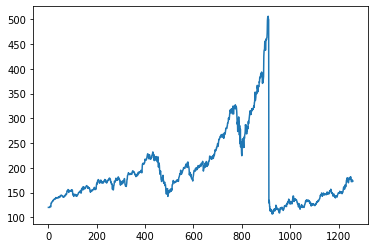

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are sensitive to the scale of the data , so we apply MinMax scalar

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
Scaler = MinMaxScaler(feature_range=(0,1))
df1=Scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.0329618 ],
       [0.03293676],
       [0.03241077],
       ...,
       [0.17204759],
       [0.1636819 ],
       [0.16588604]])

In [ ]:

df1.shape

(1260, 1)

In [ ]:
### splitting dataset into train and test split
training_size= int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(819, 441)

In [ ]:
import numpy
# concert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset) - time_step -1):
       a = dataset[i:(i+time_step), 0]  ### i=0, 0,1,2,3
       dataX.append(a)
       dataY.append(dataset[i+ time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t, t+1,t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(718, 100)
(718,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

# Create a stacked LSTM MODEL

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =   X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
### Create the  Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 330ms/step - loss: 0.0250 - val_loss: 0.0103
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0043 - val_loss: 0.0132
Epoch 3/100
12/12 [==============================] - 3s 210ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 4/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0010 - val_loss: 0.0078
Epoch 5/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0010 - val_loss: 0.0071
Epoch 6/100
12/12 [==============================] - 2s 206ms/step - loss: 9.1991e-04 - val_loss: 0.0061
Epoch 7/100
12/12 [==============================] - 2s 208ms/step - loss: 8.9849e-04 - val_loss: 0.0058
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 8.2609e-04 - val_loss: 0.0056
Epoch 9/100
12/12 [==============================] - 2s 205ms/step - loss: 8.0909e-04 - val_loss: 0.0051
Epoch 10/100
12/12 [==============================] - 2s 204ms/step - loss:

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.7.0'

In [ ]:
# lets do the prediction and check performance metrics
train_predict =model.predict(X_train)
test_predict =model.predict(X_test)

In [ ]:
# Transform back to original form
train_predict=Scaler.inverse_transform(train_predict)
test_predict =Scaler.inverse_transform(test_predict)

In [ ]:
# CALCULATE rmse PERFORMANCE METRIC
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

203.33511202558066

In [ ]:
# Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

138.15623462028879

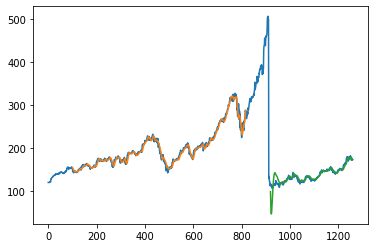

In [ ]:
# Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+ look_back, :]= train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np . nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]= test_predict

# plot baseline and predictions
plt.plot(Scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input =test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
temp_input =list(x_input)
temp_input =temp_input[0].tolist()

In [ ]:
temp_input

[0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])        # print (temp_input)
    print("{} day input{}".format(i,x_input))
    x_input=x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))    # print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output{}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]         # print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1

  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1


print(lst_output)


0 day input[0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.16385157 0.16298266
 0.16216199 0.16137151 0.16061114 0.15988532 0.15919812 0.15855183
 0.15794706 0.15738329 0.15685916 0.15637289 0.15592235 0.15550533
 0.15511933 0.15476194 0.15443069 0.15412299 0.153836

In [ ]:
day_new =np.arange(1, 101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)

1260

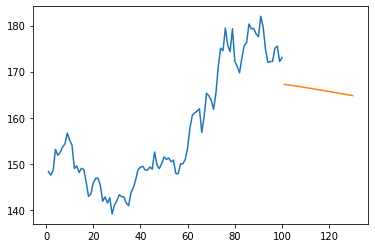

In [ ]:
plt.plot(day_new,Scaler.inverse_transform(df1[1160:]))
plt.plot(day_pred,Scaler.inverse_transform(lst_output))


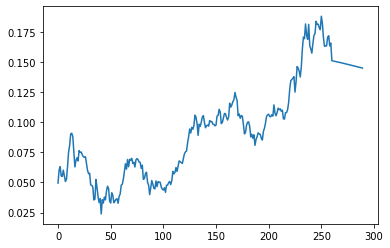

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

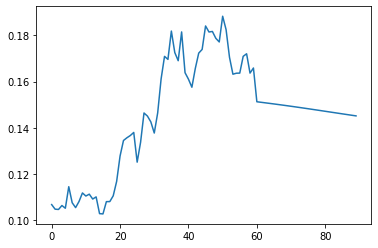

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])